In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.api as sm

In [2]:
coin_week = pd.read_csv('../files/coin_weeks_2019_2022.csv')
sp_week = pd.read_csv('../files/sp_500_weeks_2019_2022.csv')
coin_week.head()
sp_week.head()

,Date,Open,High,Low,Close
0,2019-05-24,2841.94,2868.88,2805.49,2826.06
1,2019-05-31,2830.03,2840.51,2750.52,2752.06
2,2019-06-07,2751.53,2884.97,2728.81,2873.34
3,2019-06-14,2885.83,2910.61,2874.68,2886.98
4,2019-06-21,2889.75,2964.15,2887.30,2950.46


0.898819197356544 156
84


Text(0.5, 1.0, 'BTC and SP 500 cross correlation ~ lag')

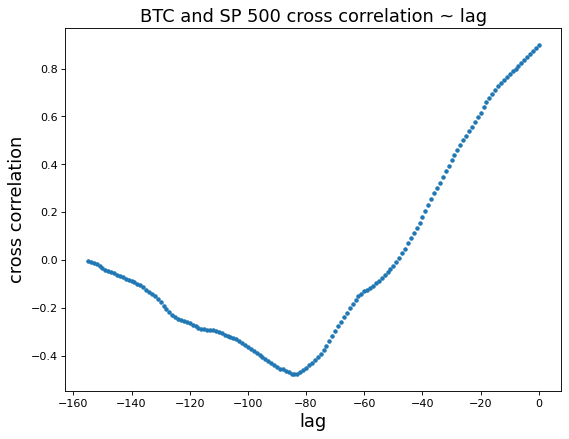

In [3]:
ccr = sm.tsa.stattools.ccf(coin_week['High'], sp_week['High'], adjusted=False)
print(ccr[0], len(ccr))
print(np.argmin(ccr))
lags = -np.arange(0,len(ccr))
figure(figsize=(8,6), dpi=80)
plt.plot(lags, ccr, '.')
plt.xlabel('lag', fontsize=16)
plt.ylabel('cross correlation', fontsize=16)
plt.title('BTC and SP 500 cross correlation ~ lag', fontsize=16)

Text(0.5, 1.0, 'BTC and SP 500 cross correlation ~ lag')

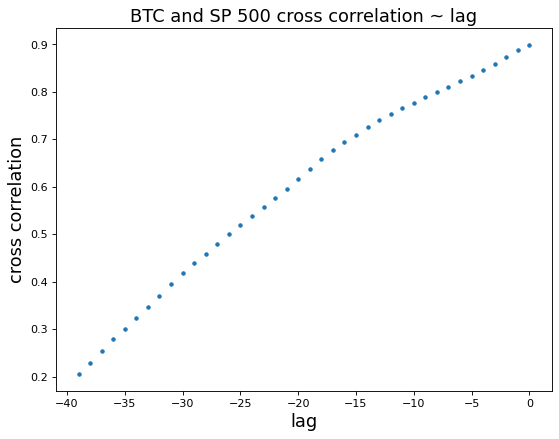

In [4]:
type(ccr)
ccr40 = ccr[0:40]
lags40 = - np.arange(0,40)

figure(figsize=(8,6), dpi=80)
plt.plot(lags40, ccr40, '.')
plt.xlabel('lag', fontsize=16)
plt.ylabel('cross correlation', fontsize=16)
plt.title('BTC and SP 500 cross correlation ~ lag', fontsize=16)

In [5]:
X = sm.add_constant(lags40)
model = sm.OLS(ccr40, X).fit()

In [6]:
print(model.params)
print(model.pvalues)

[0.94509397 0.01775476]
[3.25591444e-50 3.20983913e-36]


Text(0.5, 1.0, 'log(1 - ccr) ~ lags')

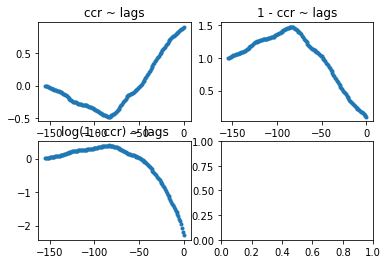

In [10]:
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(lags, ccr, '.')
axis[0, 0].set_title("ccr ~ lags")
axis[0, 1].plot(lags, 1 - ccr, '.')
axis[0, 1].set_title("1 - ccr ~ lags")
axis[1, 0].plot(lags, np.log(1 - ccr), '.')
axis[1, 0].set_title("log(1 - ccr) ~ lags")

In [7]:
dev_log = pd.DataFrame(columns=['High', 'Low', 'Open'])
coin_week_lag1 = pd.DataFrame(columns=['High', 'Low', 'Open'])
sp_week_lag1 = pd.DataFrame(columns=['High', 'Low', 'Open'])
coin_week_lag1[['High', 'Low', 'Open']] = coin_week[['High', 'Low', 'Open']].iloc[1:len(coin_week)]
sp_week_lag1[['High', 'Low', 'Open']] = sp_week[['High', 'Low', 'Open']].iloc[0:len(sp_week)-1]
coin_week_lag1.reset_index(drop=True, inplace=True)
sp_week_lag1.reset_index(drop=True, inplace=True)
print(coin_week_lag1.head())
print(sp_week_lag1.head())

           High           Low          Open
0   8785.703125   8460.398996   8616.683175
1   8138.956264   7745.431152   8041.437151
2   8496.021624   8132.185826   8218.513253
3  10029.552734   9497.844308   9581.981166
4  12426.988002  11012.423270  11735.939314
      High      Low     Open
0  2868.88  2805.49  2841.94
1  2840.51  2750.52  2830.03
2  2884.97  2728.81  2751.53
3  2910.61  2874.68  2885.83
4  2964.15  2887.30  2889.75


Text(0.5, 1.0, 'BTC and S&P 500 price in log scale (lag = 0)')

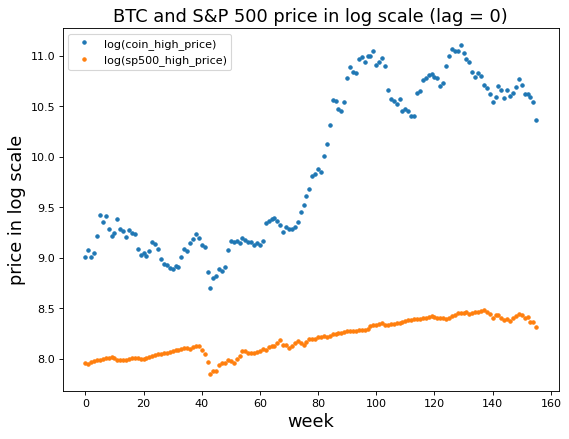

In [10]:
coin_week_log = coin_week[['High', 'Low', 'Open']].apply(np.log)
sp_week_log = sp_week[['High', 'Low', 'Open']].apply(np.log)

figure(figsize=(8,6), dpi=80)
plt.plot(np.arange(len(coin_week)), coin_week_log['High'], '.', label='log(coin_high_price)')
plt.plot(np.arange(len(sp_week)), sp_week_log['High'], '.', label='log(sp500_high_price)')
plt.xlabel('week', fontsize = 16)
plt.ylabel('price in log scale', fontsize = 16)
plt.legend(loc=0)
plt.title('BTC and S&P 500 price in log scale (lag = 0)', fontsize = 16)

       High       Low      Open
0  1.119204  1.103818  1.109213
1  1.052678  1.035313  1.044321
2  1.080084  1.091964  1.094232
3  1.237173  1.195123  1.200072
4  1.433280  1.338702  1.401486


Text(0.5, 1.0, 'BTC and S&P 500 price in log scale (lag = -1)')

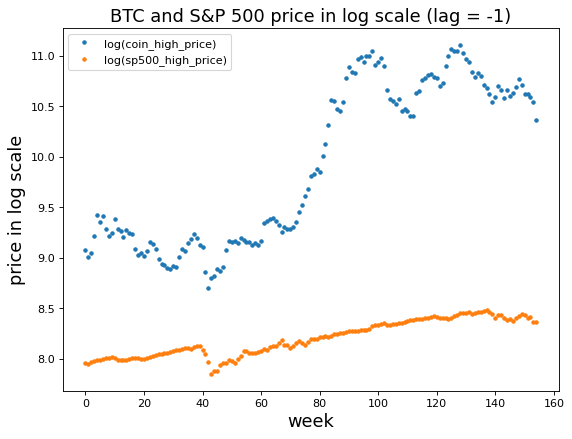

In [12]:
coin_week_lag1_log = coin_week_lag1.apply(np.log)
sp_week_lag1_log = sp_week_lag1.apply(np.log)

dev_log[['High', 'Low', 'Open']] = coin_week_lag1[['High', 'Low', 'Open']].apply(np.log) - sp_week_lag1[['High', 'Low', 'Open']].apply(np.log)
print(dev_log.head())
figure(figsize=(8,6), dpi=80)
plt.plot(np.arange(len(coin_week_lag1_log)), coin_week_lag1_log['High'], '.', label='log(coin_high_price)')
plt.plot(np.arange(len(sp_week_lag1_log)), sp_week_lag1_log['High'], '.', label='log(sp500_high_price)')
plt.xlabel('week', fontsize = 16)
plt.ylabel('price in log scale', fontsize = 16)
plt.legend(loc=0)
plt.title('BTC and S&P 500 price in log scale (lag = -1)', fontsize = 16)